IPYNB notebook to preprocess data imported from matlab, and convert it into the format accepted by the input

plotting the experimental data

In [4]:
import scipy.io
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import markers

Text(0.5, 1.0, 'PBCO experimental fitted peaks')

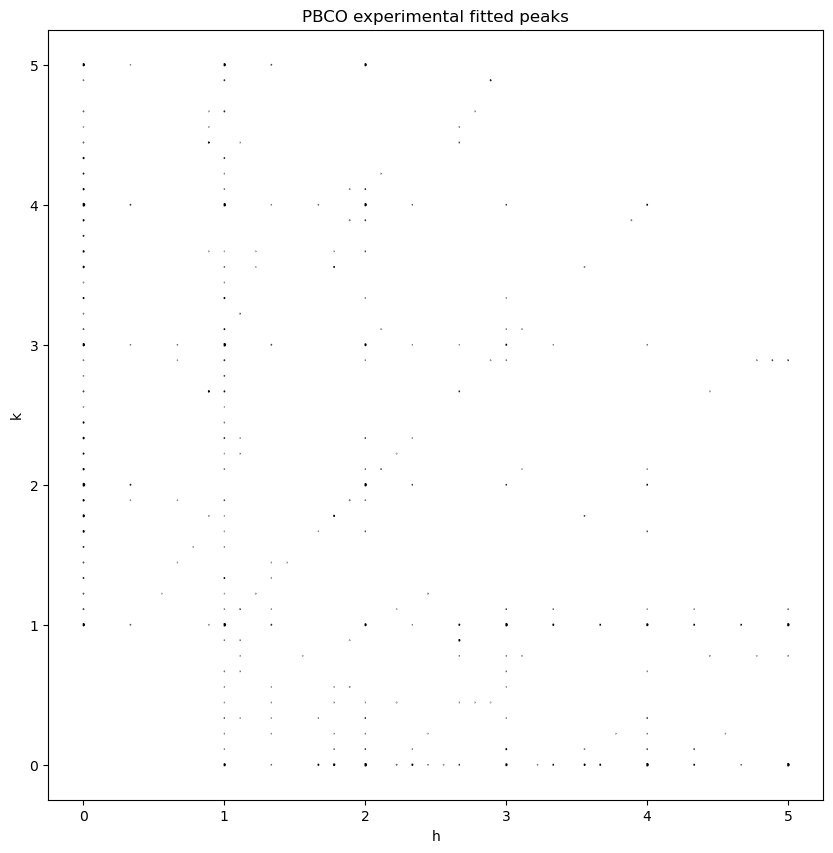

In [5]:
# Load data
h_coords = pd.read_csv('raw_data/h_coords.csv', header=None).values.flatten()
k_coords = pd.read_csv('raw_data/k_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('raw_data/intensity_arr.csv', header=None).values

h , k = np.meshgrid(h_coords , k_coords)

h_flat = h.flatten()
k_flat = k.flatten()
intensity_flat = intensity_arr.flatten()

copy_h_flat = h_flat
h_flat = k_flat
k_flat = copy_h_flat


pyplot.scatter(h_flat , k_flat , s=intensity_flat  , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('k')
#add title
pyplot.title('PBCO experimental fitted peaks')

create a csv file with 4 columns. first column is for h_coords, then for k_coords, and then for l_coords (all equal to 0). then another row for the experimental intensity, with title 'intensity_exp'.

In [3]:
#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': h_flat,
    'k': k_flat,
    'l': np.zeros_like(h_flat),  # Assuming l is zero for this exampleP
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(h_flat)
})

#remove all the rows where intensity_exp is zero
data = data[data['intensity_exp'] != 0]

#remove all rows where h and k are both integers
data = data[~((data['h'] % 1 == 0) & (data['k'] % 1 == 0))]


data.to_csv('raw_data/peaks1.csv', index=False)

print(data)

             h         k    l  intensity_exp  intensity_exp_err
10    0.000000  1.111111  0.0       0.144402                0.0
11    0.000000  1.222222  0.0       0.116108                0.0
12    0.000000  1.333333  0.0       0.191090                0.0
13    0.000000  1.444444  0.0       0.122405                0.0
14    0.000000  1.555556  0.0       0.179914                0.0
...        ...       ...  ...            ...                ...
2004  4.777778  2.888889  0.0       0.045682                0.0
2050  4.888889  2.888889  0.0       0.108925                0.0
2077  5.000000  0.777778  0.0       0.037683                0.0
2080  5.000000  1.111111  0.0       0.059146                0.0
2096  5.000000  2.888889  0.0       0.113943                0.0

[217 rows x 5 columns]


Find where to add the shifts in the list of atom coordinates. 

add the atom displacement distortions

1. check the cif file, section `_iso_parent-to-child.transform_Pp_abc` ( very end of the cif file), change the transformation accordingly in `functions`

# Print all the atom coords

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import math
import xrayutilities as xu


crystal = xu.materials.Crystal.fromCIF('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_info.cif')
for a, n, c, d in crystal.lattice.base():
    print([a, [n[0], n[1], n[2]]])

#User: copy the output of the above code into PrNiO3_C4_coords.txt
# using ctrl + f:
# 1. replace (number) with 'number' 
# 2. remove all commas
# 3. replace double spacing with single spacing


[Pr (59), [0.75, 0.25, 0.0]]
[Pr (59), [0.25, 0.75, 0.5]]
[Pr (59), [0.25, 0.75, 0.0]]
[Pr (59), [0.75, 0.25, 0.5]]
[Pr (59), [0.25, 0.25, 0.0]]
[Pr (59), [0.75, 0.75, 0.5]]
[Pr (59), [0.75, 0.75, 0.0]]
[Pr (59), [0.25, 0.25, 0.5]]
[Pr (59), [0.75, 0.0, 0.75]]
[Pr (59), [0.25, 0.5, 0.25]]
[Pr (59), [0.25, 0.0, 0.75]]
[Pr (59), [0.75, 0.5, 0.25]]
[Pr (59), [0.25, 0.0, 0.25]]
[Pr (59), [0.75, 0.5, 0.75]]
[Pr (59), [0.75, 0.0, 0.25]]
[Pr (59), [0.25, 0.5, 0.75]]
[O ( 8), [0.0, 0.875, 0.875]]
[O ( 8), [0.5, 0.375, 0.375]]
[O ( 8), [0.0, 0.125, 0.875]]
[O ( 8), [0.5, 0.625, 0.375]]
[O ( 8), [0.0, 0.875, 0.125]]
[O ( 8), [0.5, 0.375, 0.625]]
[O ( 8), [0.0, 0.125, 0.125]]
[O ( 8), [0.5, 0.625, 0.625]]
[O ( 8), [0.0, 0.875, 0.375]]
[O ( 8), [0.5, 0.375, 0.875]]
[O ( 8), [0.0, 0.125, 0.375]]
[O ( 8), [0.5, 0.625, 0.875]]
[O ( 8), [0.0, 0.875, 0.625]]
[O ( 8), [0.5, 0.375, 0.125]]
[O ( 8), [0.0, 0.125, 0.625]]
[O ( 8), [0.5, 0.625, 0.125]]
[O ( 8), [0.0, 0.375, 0.875]]
[O ( 8), [0.5, 0.875, 0.37

# The following code adds the atomic displacement variables. 

Things to do beforehand:
1. Go to `PrNiO2_C4_info.cif` , find `_atom_site_fract_symmform`
2. copy the info in `_atom_site_fract_symmform` to a new file called `PrNiO2_C4_atom_site_fract_symmform.txt`
3. In `PrNiO2_C4_atom_site_fract_symmform.txt`:
3.1 replace commas with a single space
3.2 replace double space with single space

Output:
`PrNiO2_C4_coords_processed.txt` and `PrNiO2_C4_shift_names.txt`

1. in `PrNiO2_C4_coords_processed.txt` , remove all "
2. remove the comma in the last line
3. copy all into `functions`, and into `atom_position_list`

1. in `PrNiO2_C4_shift_names.txt` , copy to variables list in `atom_position_list`

In [18]:
#load a text file into a dataframe
PBCO_coords = pd.read_csv('raw_data/PrNiO2_C4_coords.txt' , delim_whitespace=True, header=None)
PBCO_distortions = pd.read_csv('raw_data/PrNiO2_C4_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)

#load PBCO_distortions into a list of lists
PBCO_distortions = PBCO_distortions.values.tolist()
PBCO_coords = PBCO_coords.values.tolist()

#create a new column in PBCO_distortions, which adds the second column up cumulatively
PBCO_distortions = pd.DataFrame(PBCO_distortions)
PBCO_coords = pd.DataFrame(PBCO_coords)

print(PBCO_coords)
print(PBCO_distortions)

PBCO_coords[2] = PBCO_coords[2].astype(str)
PBCO_coords[3] = PBCO_coords[3].astype(str)
PBCO_coords[4] = PBCO_coords[4].astype(str)


PBCO_distortions[11] = PBCO_distortions[2].cumsum()

#create a list to store all the names of shift name variables
shift_names = []

for i in range(len(PBCO_distortions)):
    #take the ith and ith + 1 element in the last column, and load them into a variable called num_atom_start and num_atom_end. if i is 1 , then num_atom_start must equal to 1, and num_atom_end must equal to the first element in the last column
    if i == 0:
        num_atom_start = 0
        num_atom_end = PBCO_distortions.iloc[i, -1]
    else:
        num_atom_start = PBCO_distortions.iloc[i, -1] - PBCO_distortions.iloc[i, 2]
        num_atom_end = PBCO_distortions.iloc[i, -1]
    
    #check if there are Dx , Dy , Dz in the 3rd , 4th and 5th columns of PBCO_distortions
    if 'Dx' in PBCO_distortions.iloc[i, 8]:
        #string the char in the first column ith row to 'Dx'
        dx_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dx_shift_name = 0
    if 'Dy' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dy_shift_name = 0
    if 'Dz' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first coumn ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dz' 
    elif 'Dy' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dz_shift_name = 0



    if dx_shift_name != 0:
        shift_names.append(dx_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 2] = str(PBCO_coords.iloc[j, 2] + ' + ') + dx_shift_name
    if dy_shift_name != 0:
        shift_names.append(dy_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 3] = str(PBCO_coords.iloc[j, 3] + ' + ') + dy_shift_name
    if dz_shift_name != 0:
        shift_names.append(dz_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 4] = str(PBCO_coords.iloc[j, 4] + ' + ') + dz_shift_name


for k in range(len(PBCO_coords)):
    PBCO_coords.iloc[k, 0] = str("['" + PBCO_coords.iloc[k, 0] + "'")
    PBCO_coords.iloc[k, 2] = str('[' + PBCO_coords.iloc[k, 2])
    PBCO_coords.iloc[k, 4] = str(PBCO_coords.iloc[k, 4] + "]],")

print(PBCO_coords)
#save PBCO_coords to a csv file
PBCO_coords.to_csv('raw_data/PrNiO2_C4_coords_processed.txt', index=False, header=False)


print(shift_names)
# Convert shift_names to a DataFrame
shift_names = pd.DataFrame(shift_names)
#print all shift_names into a single line
shift_names_txt = shift_names[0].str.cat(sep=', ')
print(shift_names)
# Save shift_names to a text file
with open('raw_data/PrNiO2_C4_shift_names.txt', 'w') as f:
    f.write(shift_names_txt)


     0     1     2     3     4
0   Pr  '59'  0.75  0.25  0.00
1   Pr  '59'  0.25  0.75  0.50
2   Pr  '59'  0.25  0.75  0.00
3   Pr  '59'  0.75  0.25  0.50
4   Pr  '59'  0.25  0.25  0.00
..  ..   ...   ...   ...   ...
59  Ni  '28'  0.50  0.75  0.75
60  Ni  '28'  0.50  0.00  0.50
61  Ni  '28'  0.00  0.50  0.00
62  Ni  '28'  0.00  0.50  0.50
63  Ni  '28'  0.50  0.00  0.00

[64 rows x 5 columns]
       0   1   2  3     4      5      6    7   8   9   10
0   Pr1_1  Pr   8  n  0.75  0.250  0.000  1.0  Dx  Dy   0
1   Pr1_2  Pr   8  m  0.75  0.000  0.750  1.0  Dx   0  Dz
2    O1_1   O   8  l  0.00  0.875  0.875  1.0   0  Dy  Dz
3    O1_2   O   8  l  0.00  0.875  0.375  1.0   0  Dy  Dz
4    O1_3   O   8  l  0.00  0.375  0.875  1.0   0  Dy  Dz
5    O1_4   O   8  l  0.00  0.375  0.375  1.0   0  Dy  Dz
6   Ni1_1  Ni   2  a  0.00  0.000  0.000  1.0   0   0   0
7   Ni1_2  Ni   2  c  0.50  0.500  0.000  1.0   0   0   0
8   Ni1_3  Ni   8  l  0.00  0.750  0.750  1.0   0  Dy  Dz
9   Ni1_4  Ni   2  d  0.5

C:\Users\User\AppData\Local\Temp\ipykernel_14716\17570736.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_coords = pd.read_csv('raw_data/PrNiO2_C4_coords.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_14716\17570736.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_distortions = pd.read_csv('raw_data/PrNiO2_C4_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)


# the following code is only applicable if the parameters are the atomic displacements. to fit the modes directly, skip to the next section

Preprocess get mode amplitudes

In [ ]:
mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)

#CONVERT TO A LIST OF LISTS
mode_names = mode_names.values.tolist()

# Convert mode_names to a DataFrame
mode_names = pd.DataFrame(mode_names)

num_modes = len(mode_names) 
print(num_modes)

mode_name1 = []
# rewrite the mode names into a new list with the first column as the mode name 
for i in range(num_modes):
    mode_name1.append(str('"' + str(mode_names.iloc[i, 1]) + '"' + ': '))

print(mode_name1)


445
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '

C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)


In [168]:
#make a zeros array with len(shift_names) rows and columns
mode_np_matrix = np.zeros((num_modes, num_modes))

print(mode_np_matrix.shape)
print(mode_np_matrix)

#load the third column values from mode_matrix into mode_np_matrix.first column of ith row is the row number of the matrix, second column is the column number of the matrix, third column is the value of the matrix
for i in range(len(mode_matrix)):
    row = mode_matrix.iloc[i, 0] - 1
    col = mode_matrix.iloc[i, 1] - 1
    value = mode_matrix.iloc[i, 2]
    mode_np_matrix[row, col] = value

print(mode_np_matrix)


print(mode_name1)


for row in range(num_modes):
    for col in range(num_modes):
        if mode_np_matrix[row, col] != 0:
            shift_name = shift_names.iloc[col,0]
            
            if mode_np_matrix[row, col] < 0:
                matrix_element = mode_np_matrix[row, col] * -1
                string_mode_np_matrix = str(matrix_element)
                dependent = ' - ' + string_mode_np_matrix + ' * ' + shift_name
            else:
                string_mode_np_matrix = str(mode_np_matrix[row, col])
                dependent = ' + ' + string_mode_np_matrix + ' * ' + shift_name
            
            mode_name1[row] = str(mode_name1[row]) + dependent
        else:
            mode_name1[row] = str(mode_name1[row])



# Save mode_names to a text file without using pandas
with open('raw_data/mode_names_processed.txt', 'w') as f:
    for name in mode_name1:
        f.write(name + ',' + '\n')


'''mode_names_txt = pd.DataFrame(mode_name1)
mode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)

'''


(445, 445)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.32635  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.32635  0.3473  ...  0.       0.       0.     ]
 [-0.17365  0.       0.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.       0.      -0.17365]
 [ 0.       0.       0.      ...  0.03015  0.       0.     ]
 [ 0.       0.       0.      ...  0.      -0.17365  0.     ]]
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h

"mode_names_txt = pd.DataFrame(mode_name1)\nmode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)\n\n"

# This is the next section. fit the mode amplitudes directly
Things to do beforehand:
1. create txt file PrNiO2_C4_mode_amp_bounds.txt
2. from PrNiO2_C4.str file, at mode definitions, copy all mode names and their info
3. run the file

the code should generate 2 files: PrNiO2_C4_mode_names_variable , PrNiO2_C4_max_bound_vectors

`PrNiO2_C4_mode_names_variable.txt`: copy this into `functions`, into `shift_atoms`.

`PrNiO2_C4_max_bound_vectors.txt`: copy this into `gradientdescent.ipynb` to `max_mode_amps`




In [ ]:
mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_mode_amp_bounds' , delim_whitespace=True, header=None)
print(mode_amp_bounds)
max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()

mode_names_variable = mode_amp_bounds.iloc[:, 1].values.tolist()

#remove '!' from all elements in mode_names
mode_names_variable = [name.replace('!', '') for name in mode_names_variable]

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_mode_names_variable.txt', 'w') as f:
    for name in mode_names_variable:
        f.write(name + ',')

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_max_bound_vectors.txt', 'w') as f:
    for vector in max_bound_vectors:
        f.write(str(vector) + ',')


      0     1    2    3     4    5     6  \
0   prm   !a1  0.0  min -2.00  max  2.00   
1   prm   !a2  0.0  min -2.00  max  2.00   
2   prm   !a3  0.0  min -2.83  max  2.83   
3   prm   !a4  0.0  min -2.83  max  2.83   
4   prm   !a5  0.0  min -4.00  max  4.00   
5   prm   !a6  0.0  min -4.00  max  4.00   
6   prm   !a7  0.0  min -4.00  max  4.00   
7   prm   !a8  0.0  min -4.00  max  4.00   
8   prm   !a9  0.0  min -4.00  max  4.00   
9   prm  !a10  0.0  min -4.00  max  4.00   
10  prm  !a11  0.0  min -4.00  max  4.00   
11  prm  !a12  0.0  min -4.00  max  4.00   
12  prm  !a13  0.0  min -2.00  max  2.00   
13  prm  !a14  0.0  min -2.00  max  2.00   

                                             7       8  
0   'P4/mmm[1/4,1/4,1/2]S1(a,0;b,0)[Pr1:d:dsp]  A2u(a)  
1   'P4/mmm[1/4,1/4,1/2]S1(a,0;b,0)[Pr1:d:dsp]  A2u(b)  
2          'P4/mmm[0,1/2,0]X1+(a;a)[Pr1:d:dsp]   Eu(a)  
3          'P4/mmm[0,1/2,0]X2+(a;a)[Pr1:d:dsp]   Eu(a)  
4    'P4/mmm[1/4,1/4,1/2]S1(a,0;b,0)[O1:f:dsp]  B3u(a)

C:\Users\User\AppData\Local\Temp\ipykernel_14716\567691469.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_mode_amp_bounds' , delim_whitespace=True, header=None)


1. go to `PrNiO2_C4_info.str`
2. find `mode-amplitude to delta transformation`
3. remove `;:  0.00000` 
4. remove everything in front and including the = sign in each line
5. run code
6. remove all `'` from the file.
7. remove last comma
8. copy to `shift_atoms`

In [19]:
delta_transform = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_delta_translformation.txt' ,header=None)
delta_transform = pd.DataFrame(delta_transform)

print(delta_transform)

# Convert delta_transform to a list of lists
delta_transform = delta_transform.values.tolist()

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PrNiO2/C4/raw_data/PrNiO2_C4_delta_translformation_processed.txt', 'w') as f:
    for row in delta_transform:
        f.write( str(row)  + ',\n')

                                                    0
0                                       +  0.07620*a2
1                         +  0.03188*a3 +  0.03188*a4
2                                       +  0.07620*a1
3                         -  0.03188*a3 +  0.03188*a4
4   -  0.01594*a5 +  0.01594*a6 -  0.01594*a7 -  0...
5   +  0.01594*a5 -  0.01594*a6 -  0.01594*a7 -  0...
6   -  0.01594*a5 -  0.01594*a6 -  0.01594*a7 +  0...
7   +  0.01594*a5 +  0.01594*a6 -  0.01594*a7 +  0...
8   +  0.01594*a5 +  0.01594*a6 +  0.01594*a7 -  0...
9   -  0.01594*a5 -  0.01594*a6 +  0.01594*a7 -  0...
10  +  0.01594*a5 -  0.01594*a6 +  0.01594*a7 +  0...
11  -  0.01594*a5 +  0.01594*a6 +  0.01594*a7 +  0...
12                                     -  0.04509*a13
13                                     -  0.04509*a14


in `cif` file, go to section `_iso_displacivemode_value` and copy all the modes, and create a file called `PrNiO2_C4_displacivemode_names.txt`.